In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
#df11 = pd.read_csv(r'C:\jintu\DATA\Raw data Air pollution\my3_1771976.csv')
#df11 = pd.read_csv(r'C:\jintu\DATA\Raw data Air pollution\id1_1753200.csv')
df11 = pd.read_csv(r'C:\jintu\DATA\Raw data Air pollution\ph2_1754143.csv')
#dfa = pd.concat([df11,df12]) #([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11])
df11

,created_at,entry_id,field1,field2,field3,field4,field5,field6,field7,field8
0,2022-06-29 17:02:57 +0800,1,360.714286,299.539171,20670.212766,11022.364217,23,48,6.0,7
1,2022-06-29 17:03:17 +0800,2,232.142857,188.940092,20191.489362,2993.610224,23,48,6.0,7
2,2022-06-29 17:03:37 +0800,3,210.714286,165.898618,20191.489362,1281.150160,23,49,6.0,8
3,2022-06-29 17:03:57 +0800,4,196.428571,152.073733,20196.808511,955.271565,23,48,5.0,5
4,2022-06-29 17:04:17 +0800,5,57.142857,57.603687,20196.808511,776.357827,23,49,4.0,4
...,...,...,...,...,...,...,...,...,...,...
871540,2023-12-16 10:12:34 +0800,1022233,0.000000,0.000000,271.276596,0.000000,29,64,4.0,5
871541,2023-12-16 10:12:54 +0800,1022234,0.000000,0.000000,292.553191,3.194888,29,64,2.0,2
871542,2023-12-16 10:13:14 +0800,1022235,3.571429,0.000000,281.914894,19.169329,29,64,3.0,3
871543,2023-12-16 10:13:34 +0800,1022236,0.000000,0.000000,265.957447,3.194888,29,64,3.0,3


In [12]:
dfa = df11[['created_at','field1','field2','field3','field4','field5',
            'field6','field7','field8']]
#df12.columns = ['created_at', 'id','NO2','O3','CO','SO2','Temp','RH','PM2.5','PM10']
dfa

,created_at,field1,field2,field3,field4,field5,field6,field7,field8
0,2022-06-29 17:02:57 +0800,360.714286,299.539171,20670.212766,11022.364217,23,48,6.0,7
1,2022-06-29 17:03:17 +0800,232.142857,188.940092,20191.489362,2993.610224,23,48,6.0,7
2,2022-06-29 17:03:37 +0800,210.714286,165.898618,20191.489362,1281.150160,23,49,6.0,8
3,2022-06-29 17:03:57 +0800,196.428571,152.073733,20196.808511,955.271565,23,48,5.0,5
4,2022-06-29 17:04:17 +0800,57.142857,57.603687,20196.808511,776.357827,23,49,4.0,4
...,...,...,...,...,...,...,...,...,...
871540,2023-12-16 10:12:34 +0800,0.000000,0.000000,271.276596,0.000000,29,64,4.0,5
871541,2023-12-16 10:12:54 +0800,0.000000,0.000000,292.553191,3.194888,29,64,2.0,2
871542,2023-12-16 10:13:14 +0800,3.571429,0.000000,281.914894,19.169329,29,64,3.0,3
871543,2023-12-16 10:13:34 +0800,0.000000,0.000000,265.957447,3.194888,29,64,3.0,3


In [13]:
def pp_sample_fill(df, ts_col, s_freq, fill_method):
    df[ts_col] = df[ts_col].apply(lambda x:x.split('+')[0])
    df[ts_col] = pd.to_datetime(df[ts_col])
    df[ts_col] = df[ts_col].dt.round('min')
    df.fillna(method=fill_method, axis=None, inplace=True, limit=None, downcast=None)
    df.set_index(ts_col, inplace=True)
    data=df.resample(s_freq).mean()
    data.fillna(method=fill_method, axis=None, inplace=True, limit=None, downcast=None)
    return data

In [14]:
df=pd.DataFrame()
df[['created_at','NO2','O3','CO','SO2','Temp','RH','PM2.5','PM10']] = dfa[['created_at','field1',
                                                                           'field2','field3',
                                                                           'field4','field5',
                                                                           'field6','field7',
                                                                           'field8']]
df['created_at'] = df['created_at'].apply(lambda x:x.split('+')[0])
df['created_at'] = pd.to_datetime(df['created_at'])
df['created_at'] = df['created_at'].dt.round('min')
df

,created_at,NO2,O3,CO,SO2,Temp,RH,PM2.5,PM10
0,2022-06-29 17:03:00,360.714286,299.539171,20670.212766,11022.364217,23,48,6.0,7
1,2022-06-29 17:03:00,232.142857,188.940092,20191.489362,2993.610224,23,48,6.0,7
2,2022-06-29 17:04:00,210.714286,165.898618,20191.489362,1281.150160,23,49,6.0,8
3,2022-06-29 17:04:00,196.428571,152.073733,20196.808511,955.271565,23,48,5.0,5
4,2022-06-29 17:04:00,57.142857,57.603687,20196.808511,776.357827,23,49,4.0,4
...,...,...,...,...,...,...,...,...,...
871540,2023-12-16 10:13:00,0.000000,0.000000,271.276596,0.000000,29,64,4.0,5
871541,2023-12-16 10:13:00,0.000000,0.000000,292.553191,3.194888,29,64,2.0,2
871542,2023-12-16 10:13:00,3.571429,0.000000,281.914894,19.169329,29,64,3.0,3
871543,2023-12-16 10:14:00,0.000000,0.000000,265.957447,3.194888,29,64,3.0,3


In [15]:
df

,created_at,NO2,O3,CO,SO2,Temp,RH,PM2.5,PM10
0,2022-06-29 17:03:00,360.714286,299.539171,20670.212766,11022.364217,23,48,6.0,7
1,2022-06-29 17:03:00,232.142857,188.940092,20191.489362,2993.610224,23,48,6.0,7
2,2022-06-29 17:04:00,210.714286,165.898618,20191.489362,1281.150160,23,49,6.0,8
3,2022-06-29 17:04:00,196.428571,152.073733,20196.808511,955.271565,23,48,5.0,5
4,2022-06-29 17:04:00,57.142857,57.603687,20196.808511,776.357827,23,49,4.0,4
...,...,...,...,...,...,...,...,...,...
871540,2023-12-16 10:13:00,0.000000,0.000000,271.276596,0.000000,29,64,4.0,5
871541,2023-12-16 10:13:00,0.000000,0.000000,292.553191,3.194888,29,64,2.0,2
871542,2023-12-16 10:13:00,3.571429,0.000000,281.914894,19.169329,29,64,3.0,3
871543,2023-12-16 10:14:00,0.000000,0.000000,265.957447,3.194888,29,64,3.0,3


<AxesSubplot:>

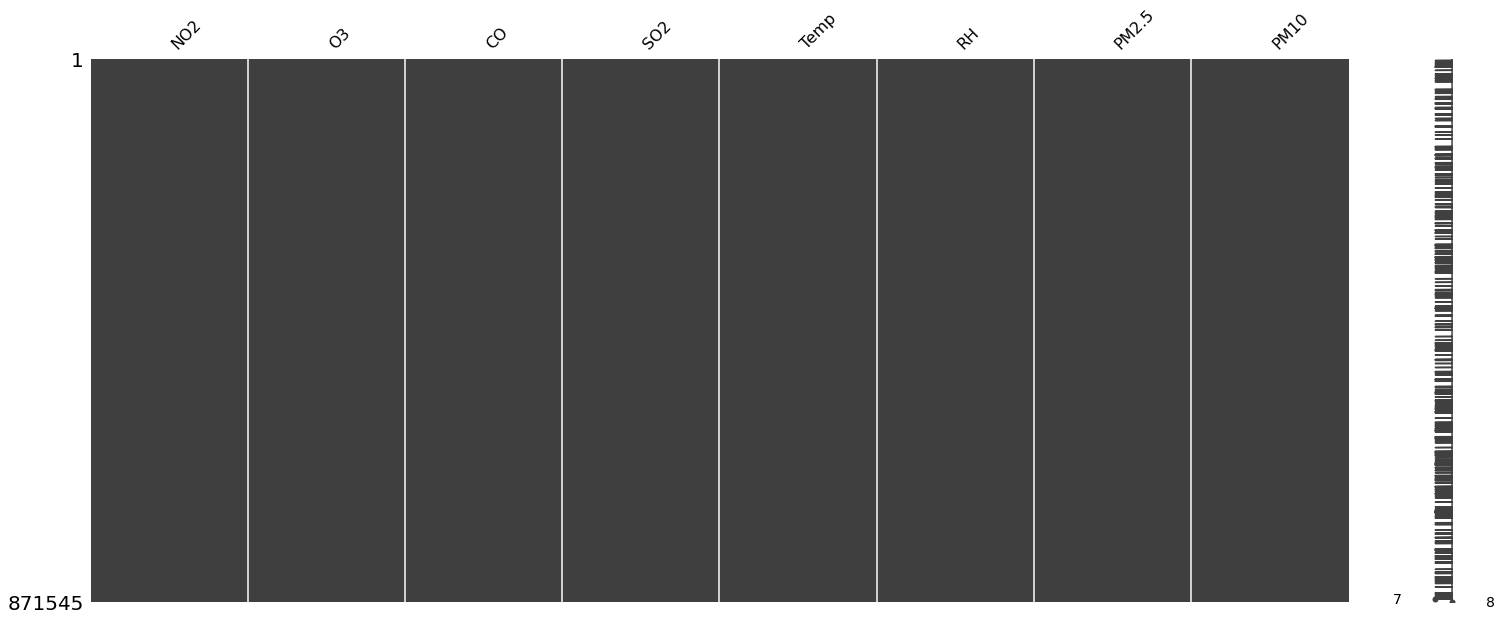

In [16]:
import missingno as msno

msno.matrix(df.set_index('created_at'))

In [17]:
df = df
df['Datetime'] = pd.to_datetime(df['created_at'], format='%Y-%m-%d %H:%M:%S')
df

,created_at,NO2,O3,CO,SO2,Temp,RH,PM2.5,PM10,Datetime
0,2022-06-29 17:03:00,360.714286,299.539171,20670.212766,11022.364217,23,48,6.0,7,2022-06-29 17:03:00
1,2022-06-29 17:03:00,232.142857,188.940092,20191.489362,2993.610224,23,48,6.0,7,2022-06-29 17:03:00
2,2022-06-29 17:04:00,210.714286,165.898618,20191.489362,1281.150160,23,49,6.0,8,2022-06-29 17:04:00
3,2022-06-29 17:04:00,196.428571,152.073733,20196.808511,955.271565,23,48,5.0,5,2022-06-29 17:04:00
4,2022-06-29 17:04:00,57.142857,57.603687,20196.808511,776.357827,23,49,4.0,4,2022-06-29 17:04:00
...,...,...,...,...,...,...,...,...,...,...
871540,2023-12-16 10:13:00,0.000000,0.000000,271.276596,0.000000,29,64,4.0,5,2023-12-16 10:13:00
871541,2023-12-16 10:13:00,0.000000,0.000000,292.553191,3.194888,29,64,2.0,2,2023-12-16 10:13:00
871542,2023-12-16 10:13:00,3.571429,0.000000,281.914894,19.169329,29,64,3.0,3,2023-12-16 10:13:00
871543,2023-12-16 10:14:00,0.000000,0.000000,265.957447,3.194888,29,64,3.0,3,2023-12-16 10:14:00


In [18]:
#df2 = df1.reset_index(drop='index')[:29233]
dfc = df.set_index('Datetime').resample('1H').mean()
dfc

C:\Users\Lab Engineer\AppData\Local\Temp\ipykernel_2968\1232986345.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfc = df.set_index('Datetime').resample('1H').mean()


,NO2,O3,CO,SO2,Temp,RH,PM2.5,PM10
Datetime,,,,,,,,
2022-06-29 17:00:00,20.327605,16.284952,2498.720205,186.576665,25.977444,58.894737,2.180451,2.398496
2022-06-29 18:00:00,8.769841,4.774706,1532.742317,21.849485,28.505556,60.794444,2.650000,2.911111
2022-06-29 19:00:00,6.865079,1.753712,1158.481087,14.660987,29.327778,61.222222,4.450000,4.827778
2022-06-29 20:00:00,5.972222,0.844854,1023.345154,13.134540,30.000000,61.883333,6.038889,6.411111
2022-06-29 21:00:00,5.932540,0.384025,1003.132388,15.814696,30.000000,62.150000,7.727778,8.388889
...,...,...,...,...,...,...,...,...
2023-12-16 06:00:00,0.396825,0.000000,295.656028,11.927583,28.000000,63.794444,2.833333,3.183333
2023-12-16 07:00:00,0.714286,0.012801,303.959811,13.525027,28.000000,64.000000,3.100000,3.538889
2023-12-16 08:00:00,0.199521,0.012872,309.253536,12.958038,28.000000,64.000000,3.413408,3.670391


<AxesSubplot:xlabel='Datetime'>

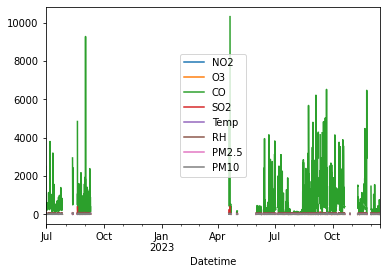

In [19]:
dfc.plot()

<AxesSubplot:xlabel='Datetime'>

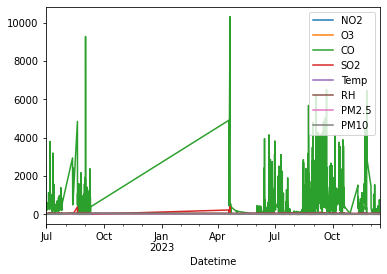

In [20]:
#df1.set_index('created_at', inplace=True)
#df1.resample('1D').mean()
#df2
df_pi = dfc#.reset_index()[['NO2','O3','CO','SO2','Temp','RH','PM2.5','PM10']]
df_imputed = df_pi.interpolate(method='time')
df_imputed.plot()

df.isnull().sum()

In [21]:

data = df_imputed#.set_index('To Date')#.fillna(method="ffill", axis=None, inplace=False, limit=None, downcast=None)
data

,NO2,O3,CO,SO2,Temp,RH,PM2.5,PM10
Datetime,,,,,,,,
2022-06-29 17:00:00,20.327605,16.284952,2498.720205,186.576665,25.977444,58.894737,2.180451,2.398496
2022-06-29 18:00:00,8.769841,4.774706,1532.742317,21.849485,28.505556,60.794444,2.650000,2.911111
2022-06-29 19:00:00,6.865079,1.753712,1158.481087,14.660987,29.327778,61.222222,4.450000,4.827778
2022-06-29 20:00:00,5.972222,0.844854,1023.345154,13.134540,30.000000,61.883333,6.038889,6.411111
2022-06-29 21:00:00,5.932540,0.384025,1003.132388,15.814696,30.000000,62.150000,7.727778,8.388889
...,...,...,...,...,...,...,...,...
2023-12-16 06:00:00,0.396825,0.000000,295.656028,11.927583,28.000000,63.794444,2.833333,3.183333
2023-12-16 07:00:00,0.714286,0.012801,303.959811,13.525027,28.000000,64.000000,3.100000,3.538889
2023-12-16 08:00:00,0.199521,0.012872,309.253536,12.958038,28.000000,64.000000,3.413408,3.670391


In [22]:

#dfa = dfa.set_index('To Date')
#data.reset_index(inplace=True)
print(data.isnull().sum())

NO2      0
O3       0
CO       0
SO2      0
Temp     0
RH       0
PM2.5    0
PM10     0
dtype: int64


In [23]:
#dfc.reset_index(inplace=True)

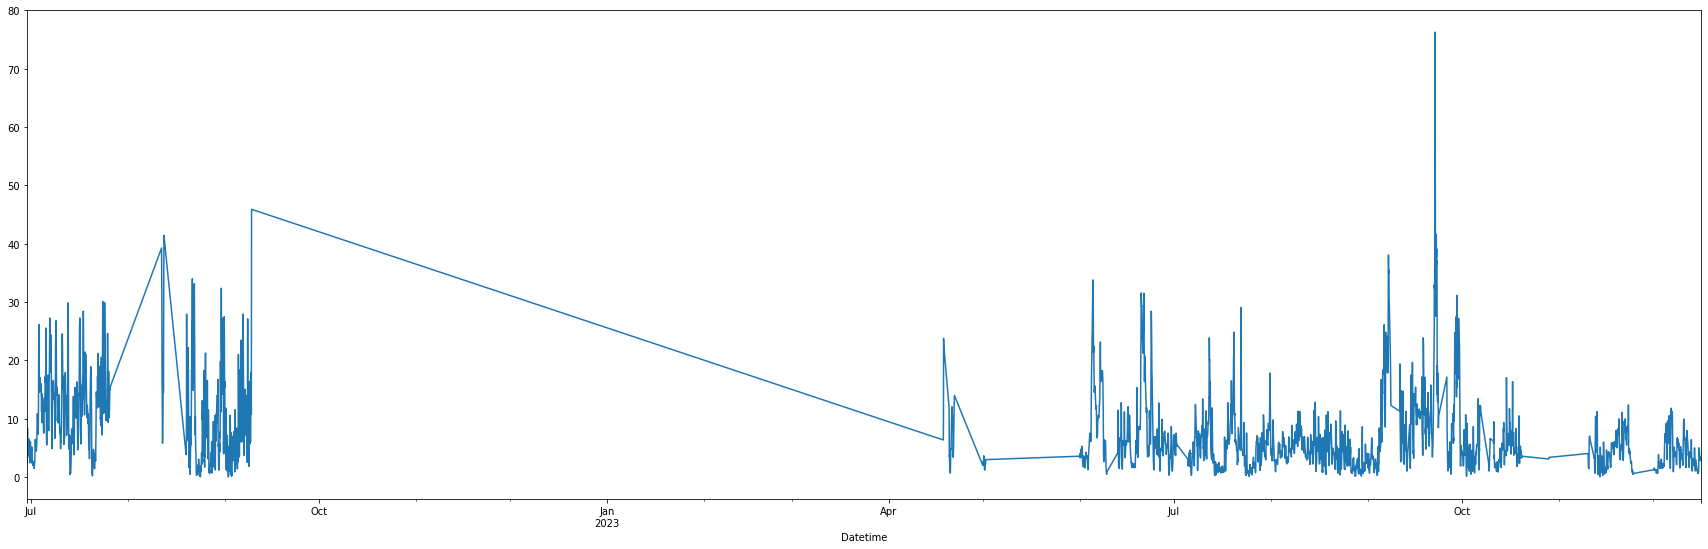

In [24]:
plt.figure(figsize=(30,9))
data['PM2.5'].iloc[:].plot()

plt.show()

In [25]:
data['O3'].iloc[:2000]

Datetime
2022-06-29 17:00:00    16.284952
2022-06-29 18:00:00     4.774706
2022-06-29 19:00:00     1.753712
2022-06-29 20:00:00     0.844854
2022-06-29 21:00:00     0.384025
                         ...    
2022-09-20 20:00:00    18.891505
2022-09-20 21:00:00    18.894137
2022-09-20 22:00:00    18.896769
2022-09-20 23:00:00    18.899400
2022-09-21 00:00:00    18.902032
Freq: H, Name: O3, Length: 2000, dtype: float64

<AxesSubplot:>

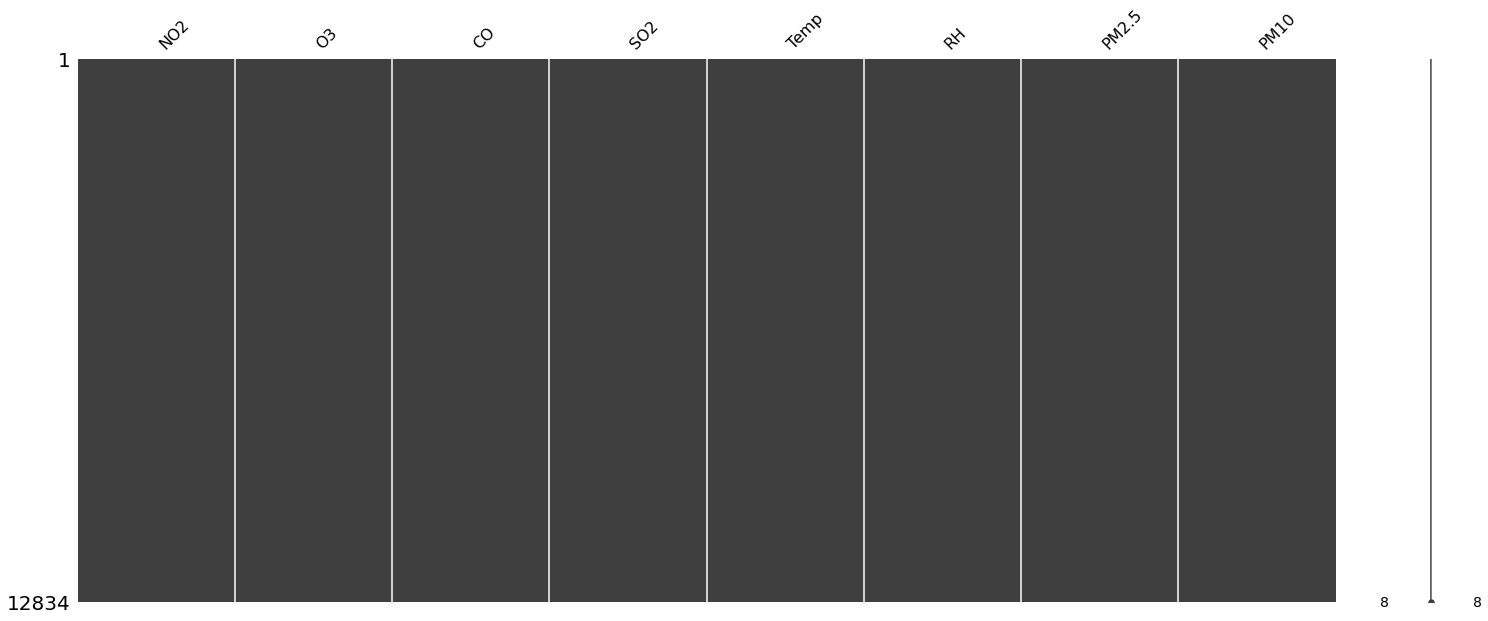

In [26]:
msno.matrix(data)

In [27]:
testdf = data[data.isnull()==False]
testdf

,NO2,O3,CO,SO2,Temp,RH,PM2.5,PM10
Datetime,,,,,,,,
2022-06-29 17:00:00,20.327605,16.284952,2498.720205,186.576665,25.977444,58.894737,2.180451,2.398496
2022-06-29 18:00:00,8.769841,4.774706,1532.742317,21.849485,28.505556,60.794444,2.650000,2.911111
2022-06-29 19:00:00,6.865079,1.753712,1158.481087,14.660987,29.327778,61.222222,4.450000,4.827778
2022-06-29 20:00:00,5.972222,0.844854,1023.345154,13.134540,30.000000,61.883333,6.038889,6.411111
2022-06-29 21:00:00,5.932540,0.384025,1003.132388,15.814696,30.000000,62.150000,7.727778,8.388889
...,...,...,...,...,...,...,...,...
2023-12-16 06:00:00,0.396825,0.000000,295.656028,11.927583,28.000000,63.794444,2.833333,3.183333
2023-12-16 07:00:00,0.714286,0.012801,303.959811,13.525027,28.000000,64.000000,3.100000,3.538889
2023-12-16 08:00:00,0.199521,0.012872,309.253536,12.958038,28.000000,64.000000,3.413408,3.670391


In [28]:
target = ['NO2','O3',
         'CO','SO2',
         'PM2.5','PM10']
covs = ['Temp', 'RH']
d_var = data[target]
d_covar = data[covs]

In [29]:
from darts.timeseries import TimeSeries

ts_1 = TimeSeries.from_dataframe(d_var)
ts_2 = TimeSeries.from_dataframe(d_covar)

train_Y = ts_1.drop_after(pd.Timestamp('2022-12-31 23:00:00'))
train_X = ts_2.drop_after(pd.Timestamp('2023-01-31 23:00:00'))

test_Y = ts_1.drop_before(pd.Timestamp('2022-12-31 23:00:00')).drop_after(pd.Timestamp('2023-01-31 23:00:00'))
test_X = ts_2.drop_before(pd.Timestamp('2022-12-31 23:00:00')).drop_after(pd.Timestamp('2023-01-31 23:00:00'))

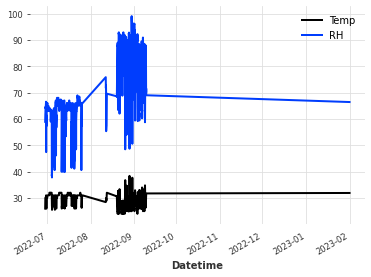

In [30]:
train_X.plot()

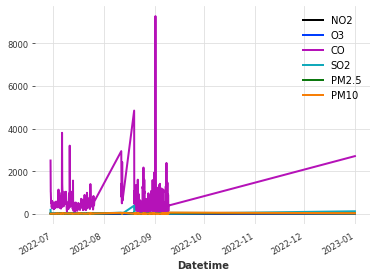

In [31]:
train_Y.plot()

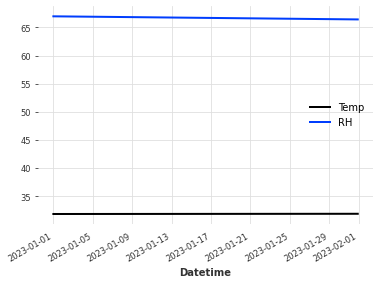

In [32]:
test_X.plot()

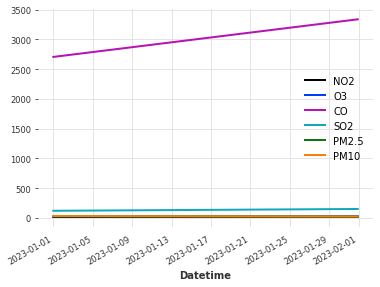

In [33]:
test_Y.plot()

In [34]:
from sklearn.preprocessing import MinMaxScaler
from darts.dataprocessing.transformers import Scaler

scaler = MinMaxScaler(feature_range=(0,1))
transformer1 = Scaler(scaler)
transformer2 = Scaler(scaler)
ts_1_transformed = transformer1.fit_transform(ts_1)
ts_2_transformed = transformer2.fit_transform(ts_2)

In [35]:
train_Y_scaled = ts_1_transformed.drop_after(pd.Timestamp('2022-12-31 23:00:00'))
train_X_scaled = ts_2_transformed.drop_after(pd.Timestamp('2023-01-31 23:00:00'))
                                                                                             
test_Y_scaled = ts_1_transformed.drop_before(pd.Timestamp('2022-12-31 23:00:00')).drop_after(pd.Timestamp('2023-01-31 23:00:00'))
test_X_scaled = ts_2_transformed.drop_before(pd.Timestamp('2022-12-31 23:00:00')).drop_after(pd.Timestamp('2023-01-31 23:00:00'))

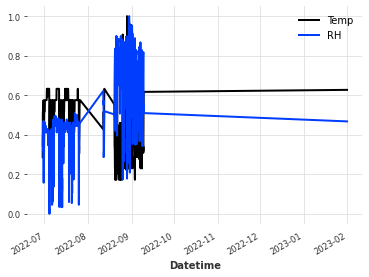

In [36]:
train_X_scaled.plot()

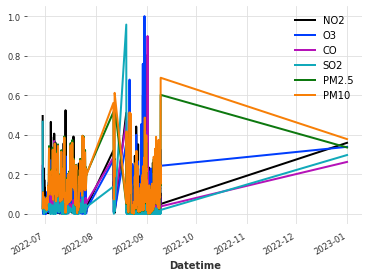

In [37]:
train_Y_scaled.plot()

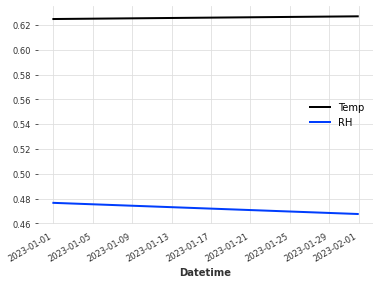

In [38]:
test_X_scaled.plot()

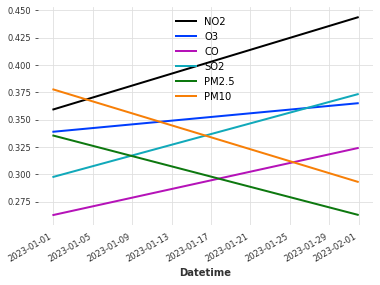

In [39]:
test_Y_scaled.plot()

In [40]:
from darts.models.forecasting.regression_model import RegressionModel as RM
from sklearn.linear_model import Ridge

model_rm = RM(model=Ridge(),
              lags=12,
              lags_future_covariates=(12,2),
              output_chunk_length=24)
model_rm.fit(train_Y_scaled, future_covariates=train_X_scaled)
pred_rm = model_rm.predict(len(test_X_scaled))

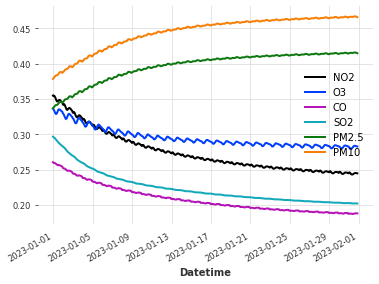

In [41]:
pred_rm.plot()

In [42]:
from darts.models import LinearRegressionModel as LRM

model_lrm = LRM(
              lags=12,
              lags_future_covariates=(12,2),
              output_chunk_length=24,
multi_models=True)
model_lrm.fit(train_Y_scaled, future_covariates=train_X_scaled)
pred_lrm = model_lrm.predict(len(test_X_scaled))

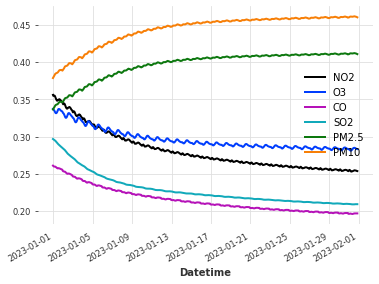

In [43]:
pred_lrm.plot()

In [44]:
from darts.models import BlockRNNModel as RNN

model_rnn = RNN(model='RNN',
                input_chunk_length=12,
              output_chunk_length=24,
               n_rnn_layers=5,
               hidden_dim=64,
               dropout=0.2,
               batch_size=24)

model_rnn.fit(train_Y_scaled, past_covariates=train_X_scaled)
pred_rnn = model_rnn.predict(len(test_X_scaled))

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | RNN              | 38.0 K
4 | fc            | Sequential       | 9.4 K 
---------------------------------------------------
47.4 K    Trainable params
0         Non-trainable params
47.4 K    Total params
0.379     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting: 0it [00:00, ?it/s]

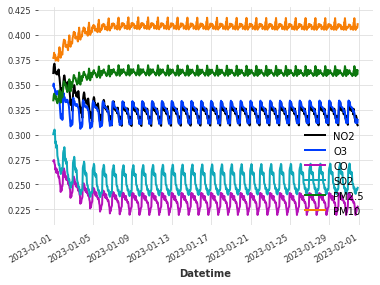

In [45]:
pred_rnn.plot()

In [46]:
model_lstm = RNN(model='LSTM',
                input_chunk_length=12,
              output_chunk_length=24,
               n_rnn_layers=5,
               hidden_dim=64,
               dropout=0.2,
               batch_size=24)

model_lstm.fit(train_Y_scaled, past_covariates=train_X_scaled)
pred_lstm = model_lstm.predict(len(test_X_scaled))

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | LSTM             | 152 K 
4 | fc            | Sequential       | 9.4 K 
---------------------------------------------------
161 K     Trainable params
0         Non-trainable params
161 K     Total params
1.291     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting: 0it [00:00, ?it/s]

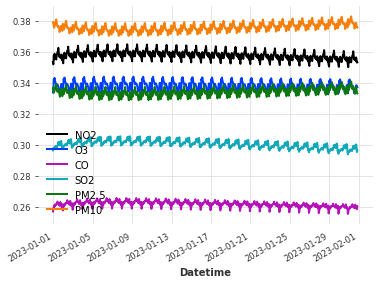

In [47]:
pred_lstm.plot()

In [48]:
model_gru = RNN(model='GRU',
                input_chunk_length=12,
              output_chunk_length=24,
               n_rnn_layers=5,
               hidden_dim=64,
               dropout=0.2,
               batch_size=24)

model_gru.fit(train_Y_scaled, past_covariates=train_X_scaled)
pred_gru = model_gru.predict(len(test_X_scaled))

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | GRU              | 114 K 
4 | fc            | Sequential       | 9.4 K 
---------------------------------------------------
123 K     Trainable params
0         Non-trainable params
123 K     Total params
0.987     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting: 0it [00:00, ?it/s]

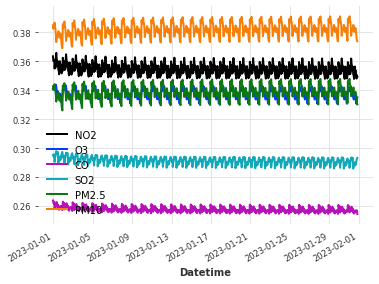

In [49]:
pred_gru.plot()

In [50]:
from darts.models import XGBModel as XGB

model_xgb = XGB(lags=12,
               lags_future_covariates=(12,2),
               output_chunk_length=24)

model_xgb.fit(train_Y_scaled, future_covariates=train_X_scaled)
pred_xgb = model_xgb.predict(len(test_Y_scaled))

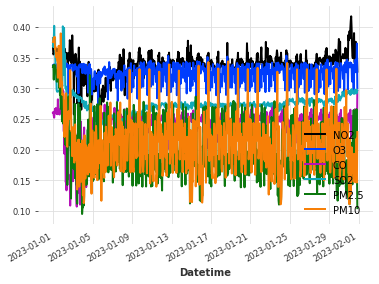

In [51]:
pred_xgb.plot()

In [52]:
from darts.models import LightGBMModel as LGB

model_lgb = LGB(lags=12,
               lags_future_covariates=(12,2),
               output_chunk_length=24)

model_lgb.fit(train_Y_scaled, future_covariates=train_X_scaled)
pred_lgb = model_lgb.predict(len(test_Y_scaled))

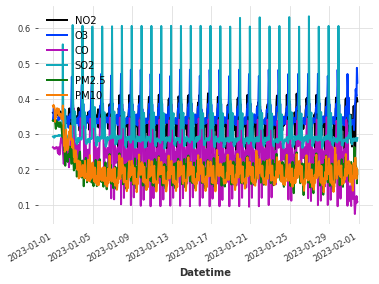

In [53]:
pred_lgb.plot()

In [54]:
from darts.models import RandomForest as RF

model_rf = RF(lags=12,
               lags_future_covariates=(12,2),
               output_chunk_length=24,
             n_estimators=500,
             max_depth=50,
             multi_models=True)

model_rf.fit(train_Y_scaled, future_covariates=train_X_scaled)
pred_rf = model_rf.predict(len(test_Y_scaled))

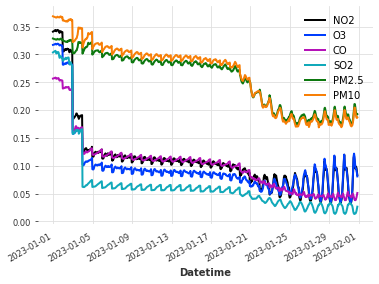

In [55]:
pred_rf.plot()

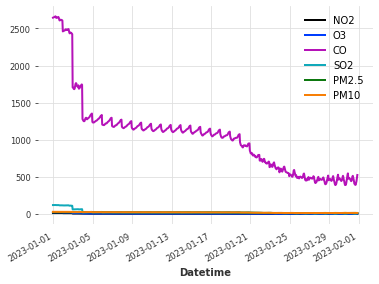

In [56]:
transformer1.inverse_transform(pred_rf).plot()

In [57]:
transformer1.inverse_transform(pred_rnn).pd_dataframe().to_excel(r'C:\jintu\TAR LSTM Work\PH2\rnn_preds.xlsx')
transformer1.inverse_transform(pred_lstm).pd_dataframe().to_excel(r'C:\jintu\TAR LSTM Work\PH2\lstm_preds.xlsx')
transformer1.inverse_transform(pred_gru).pd_dataframe().to_excel(r'C:\jintu\TAR LSTM Work\PH2\gru_preds.xlsx')
transformer1.inverse_transform(pred_xgb).pd_dataframe().to_excel(r'C:\jintu\TAR LSTM Work\PH2\xgb_preds.xlsx')
transformer1.inverse_transform(pred_lgb).pd_dataframe().to_excel(r'C:\jintu\TAR LSTM Work\PH2\lgb_preds.xlsx')
transformer1.inverse_transform(pred_rf).pd_dataframe().to_excel(r'C:\jintu\TAR LSTM Work\PH2\rf_preds.xlsx')
transformer1.inverse_transform(test_Y_scaled).pd_dataframe().to_excel(r'C:\jintu\TAR LSTM Work\PH2\actuals.xlsx')